#ANOMALY DETECTION

1.What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples

ans-

    Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior. These unusual observations are called anomalies or outliers and often indicate errors, fraud, faults, or rare events.

    Types of Anomalies

    1.Point Anomaly

    A single data point is abnormal compared to the rest.

    Example: A credit card transaction of ₹1,00,000 when normal transactions are below ₹5,000.

    2.Contextual Anomaly

    An anomaly depends on context such as time or location.

    Example: Temperature of 30°C is normal in summer but anomalous in winter.

    3.Collective Anomaly

    A group of related data points is anomalous together.

    Example: Sudden continuous spike in network traffic indicating a DDoS attack.

2.Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases

ans-

    Isolation forest
    approach- randomly isolates points using decision tree
    suitable use case-Large datasets, high-dimensional data

    DBSCAN
    approach-density based clustering
    suitable use case-Spatial data, noise detection

    Local outlier factor
    approach-Compares local density of points
    suitable use case-Detecting local anomalies

    Summary:

    Isolation Forest → Fast, scalable

    DBSCAN → Shape-based clusters

    LOF → Local neighborhood anomalies

3.What are the key components of a Time Series? Explain each with one
example.

ans-

    Key components of a Time Series

    Trend
    Long-term upward or downward movement
    Example: Increasing airline passengers over years
    
    Seasonality
    Repeating pattern at fixed intervals
    Example: Higher sales during festivals

    Cyclic
    Long-term economic cycles
    Example: Boom and recession cycles
    
    Irregular (Noise)
    Random fluctuations
    Example: Sudden spike due to unexpected event

4.Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

ans-

    A stationary time series has:
    Constant mean
    Constant variance
    Constant autocovariance over time

    Testing Stationarity
    ADF (Augmented Dickey-Fuller) Test
    p-value < 0.05 → stationary

    Transforming Non-Stationary Data
    Differencing
    Log transformation
    Seasonal differencing

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

ans-

               Model	                        Description	Application
    AR	    Depends on past values	            Short-term forecasting
    MA	    Depends on past errors	            Noise modeling
    ARIMA	  AR + MA + differencing	          Non-stationary series
    SARIMA	  ARIMA + seasonality	              Seasonal data
    SARIMAX	 SARIMA + exogenous variables	    Weather, promotions


6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

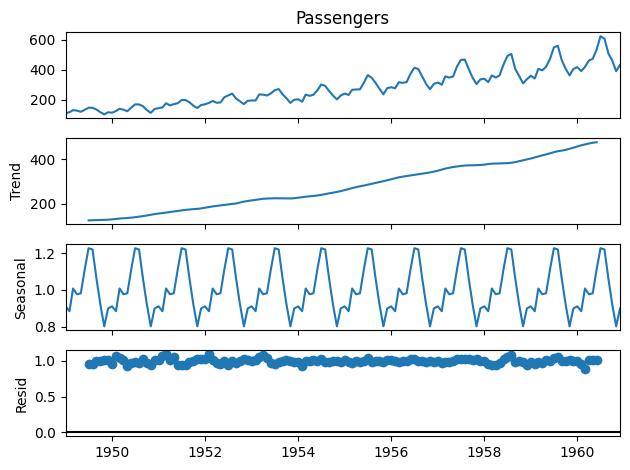

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"], index_col="Month"
)

result = seasonal_decompose(data['Passengers'], model='multiplicative')

result.plot()
plt.show()


7.Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot

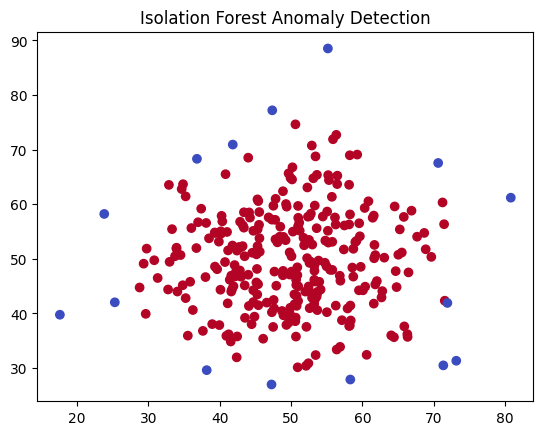

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)
X = np.random.normal(50, 10, size=(300, 2))

model = IsolationForest(contamination=0.05)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()


8.Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


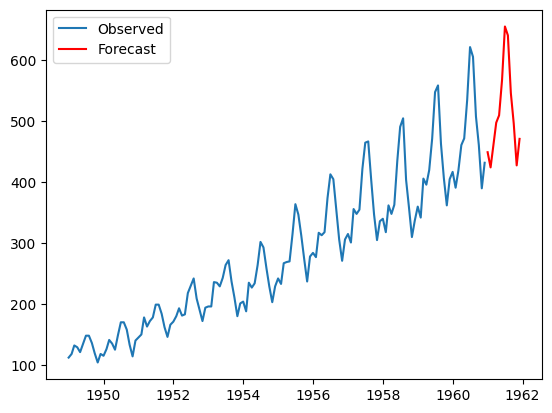

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
fit = model.fit()

forecast = fit.forecast(steps=12)

plt.plot(data['Passengers'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.


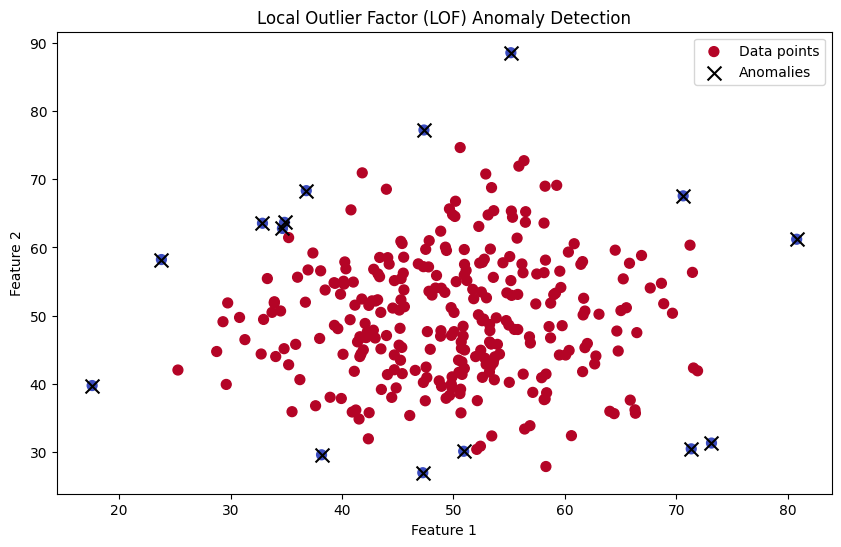

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Using the 'X' dataset generated in the previous example (cell Xm1JubmfhsK-)
# X = np.random.normal(50, 10, size=(300, 2)) # Uncomment if X is not available from kernel state

# Initialize Local Outlier Factor model
# contamination is the proportion of outliers in the data set.
# It's an estimate, and can be adjusted based on domain knowledge.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict outliers (-1 for outliers, 1 for inliers)
y_pred = lof.fit_predict(X)

# Get the anomaly scores (negative LOF scores)
# The lower the lof_score, the more anomalous the observation.
lof_scores = lof.negative_outlier_factor_

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=50, label='Data points')
# Plot the actual anomalies with a different marker or color
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='black', marker='x', s=100, label='Anomalies')

plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

10.: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


1. Anomaly Detection
   
   Isolation Forest → real-time scalable
   
   LOF → localized anomalies

   DBSCAN → spatial grid faults

2. Forecasting Model

    SARIMAX

    Includes weather & region as exogenous variables

    Best for short-term demand forecasting

3. Validation & Monitoring

    Rolling window evaluation

    MAE, RMSE tracking

    Drift detection

    Model retraining

4. Business Impact

   Prevent power outages

   Optimize energy generation

   Reduce operational cost

   Improve customer reliability